In [39]:
import pandas as pd


df1 = pd.read_csv("Twitter_Data.csv")
df2 = pd.read_csv("apps.csv")
df3 = pd.read_csv("user_reviews.csv")


In [40]:
print("Twitter_Data.csv columns:", df1.columns.tolist())


Twitter_Data.csv columns: ['clean_text', 'category']


In [41]:
print("apps.csv columns:", df2.columns.tolist())


apps.csv columns: ['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [42]:
print("user_reviews.csv columns:", df3.columns.tolist())


user_reviews.csv columns: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [43]:
print("\n--- Twitter_Data.csv ---")
print(df1.head())


--- Twitter_Data.csv ---
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [44]:
print("\n--- apps.csv ---")
print(df2.head())



--- apps.csv ---
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Desi

In [45]:
print("\n--- user_reviews.csv ---")
print(df3.head())



--- user_reviews.csv ---
                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [46]:
print("Twitter_Data.csv columns:", df1.columns.tolist())
df1.head()


Twitter_Data.csv columns: ['clean_text', 'category']


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [47]:
print(df3.columns.tolist())
df3.head()


['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
# Rename and select relevant columns
df3.rename(columns={"Translated_Review": "text"}, inplace=True)

# Drop rows with missing text or sentiment
df3.dropna(subset=["text", "Sentiment"], inplace=True)

# Keep only the necessary columns
df3 = df3[['text', 'Sentiment']]

# Rename 'Sentiment' to match the other dataset
df3.rename(columns={"Sentiment": "sentiment"}, inplace=True)


In [49]:
# Combine both datasets
combined_df = pd.concat([df1, df3], ignore_index=True)

# Check result
print("Combined Dataset Shape:", combined_df.shape)
print(combined_df['sentiment'].value_counts())
combined_df.head()


Combined Dataset Shape: (200407, 4)
Positive    23998
Negative     8271
Neutral      5158
Name: sentiment, dtype: int64


,clean_text,category,text,sentiment
0,when modi promised “minimum government maximum...,-1.0,NaN,NaN
1,talk all the nonsense and continue all the dra...,0.0,NaN,NaN
2,what did just say vote for modi welcome bjp t...,1.0,NaN,NaN
3,asking his supporters prefix chowkidar their n...,1.0,NaN,NaN
4,answer who among these the most powerful world...,1.0,NaN,NaN


In [50]:
!pip install nltk


In [53]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()

    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

# Apply preprocessing to your combined dataset
combined_df['cleaned_text'] = combined_df['text'].astype(str).apply(preprocess_text)

# Preview
combined_df[['text', 'cleaned_text', 'sentiment']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIKHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NIKHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\NIKHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,cleaned_text,sentiment
0,NaN,nan,NaN
1,NaN,nan,NaN
2,NaN,nan,NaN
3,NaN,nan,NaN
4,NaN,nan,NaN


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Transform the cleaned text column into vectors
X = tfidf.fit_transform(combined_df['cleaned_text']).toarray()

# Check shape
print("TF-IDF feature matrix shape:", X.shape)


TF-IDF feature matrix shape: (200407, 5000)


In [56]:
# Drop any rows with missing sentiment
combined_df = combined_df.dropna(subset=['sentiment'])

# If sentiment is a string like 'Positive', convert them to numeric
combined_df['sentiment'] = combined_df['sentiment'].replace({
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
})

# Now safely convert to integer
combined_df['sentiment'] = combined_df['sentiment'].astype(int)

# Define features and labels
X = tfidf.fit_transform(combined_df['cleaned_text']).toarray()
y = combined_df['sentiment']

# Check result
print("Target distribution:\n", y.value_counts())


Target distribution:
  1    23998
-1     8271
 0     5158
Name: sentiment, dtype: int64


In [57]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (29941, 5000)
Testing size: (7486, 5000)


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
nb_preds = nb_model.predict(X_test)

# Evaluate
print("🔍 Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))


🔍 Naive Bayes Results:
Accuracy: 0.7368421052631579
              precision    recall  f1-score   support

          -1       0.90      0.41      0.57      1653
           0       0.82      0.10      0.18      1049
           1       0.72      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.81      0.50      0.52      7486
weighted avg       0.77      0.74      0.68      7486



In [59]:
from sklearn.svm import LinearSVC

# Initialize and train SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict
svm_preds = svm_model.predict(X_test)

# Evaluate
print("🔍 SVM Results:")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print(classification_report(y_test, svm_preds))


🔍 SVM Results:
Accuracy: 0.9218541277050494
              precision    recall  f1-score   support

          -1       0.89      0.84      0.87      1653
           0       0.87      0.88      0.88      1049
           1       0.94      0.96      0.95      4784

    accuracy                           0.92      7486
   macro avg       0.90      0.89      0.90      7486
weighted avg       0.92      0.92      0.92      7486



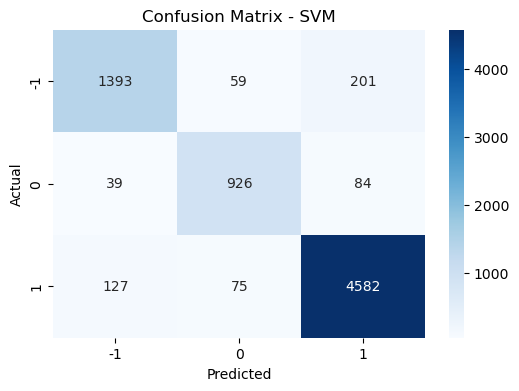

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, svm_preds)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()



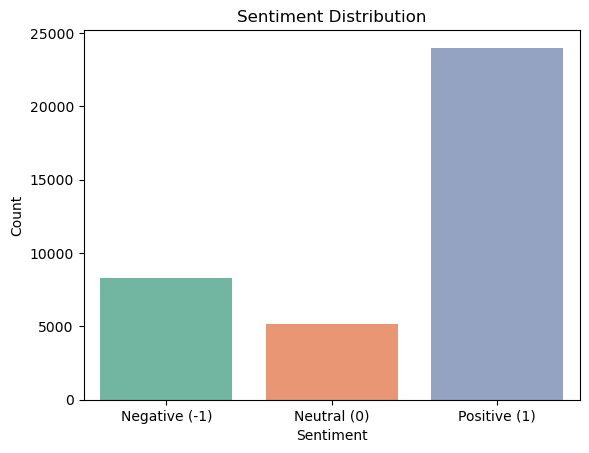

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=combined_df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["Negative (-1)", "Neutral (0)", "Positive (1)"])
plt.show()
